## Warm up exercise

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

A = np.identity(5)

print("Diagonal Matrix")
print(A)

Diagonal Matrix
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


## Plotting data

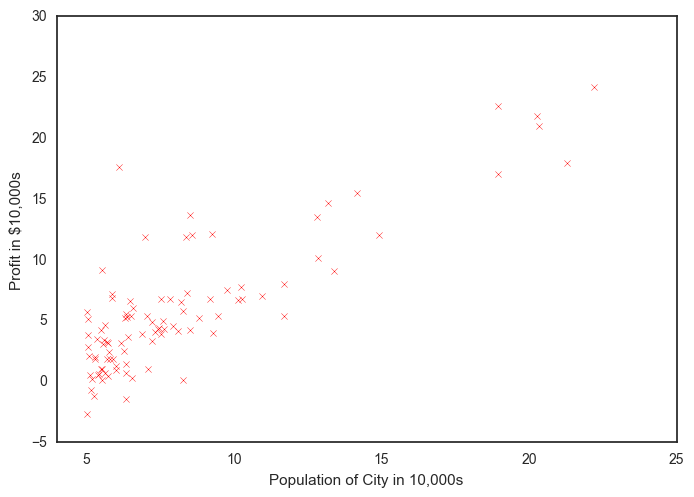

In [3]:
data = np.loadtxt("data/ex1data1.txt", delimiter=",")  # read csv
x = data[:, 0]
y = data[:, 1]  # number of training examples
m = len(y)

plt.scatter(x, y, c="r", marker="x")
plt.xlim(4,25)
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population of City in 10,000s")
plt.show()

## Linear regression with one variable

### Cost function

In [4]:
def computeCost(X, y, theta):
    m = len(y)
    
    pred = np.dot(X, theta)
    sqrErrors = (pred - y) ** 2
    
    return 1/(2 * m) * sum(sqrErrors)

### Gradient Descent

Theta:  [-3.63029144  1.16636235]


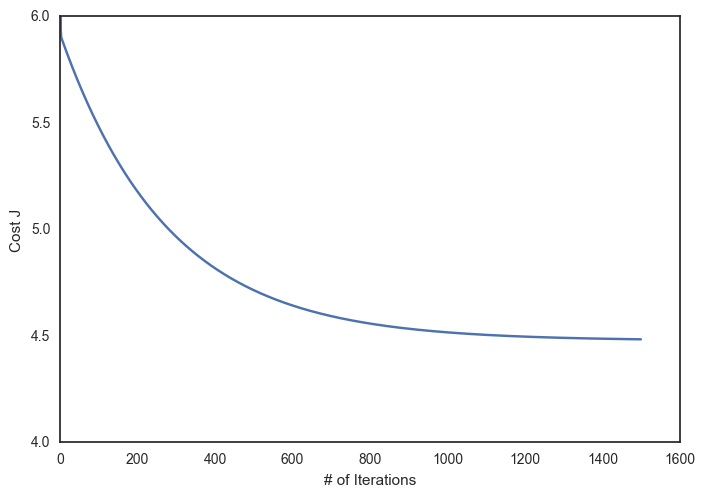

In [5]:
def gradientDescent(X, y, theta, alpha, numIterations):
    m = len(y)
    J_history = np.zeros(numIterations)
    
    for i in range(0, numIterations):
        pred = np.dot(X, theta)  # get predictions
        loss = pred - y  # calculate loss
        J_history[i] = computeCost(X, y, theta)  # calculate cost
        gradient = np.dot(X.transpose(), loss) / m  # calculate gradient
        theta = theta - (alpha * gradient)  # update theta
        
    return theta, J_history

X = np.column_stack((np.ones(m), data[:, 0]))  # add a column of ones to accomodate for theta(0) intercept term
theta = np.zeros(2)

iterations = 1500  # number of iterations
alpha = 0.01  # learning rate

theta, cost_j = gradientDescent(X, y, theta, alpha, iterations)
print("Theta: ", theta)

plt.plot(cost_j)
plt.ylim(4,6)
plt.ylabel("Cost J")
plt.xlabel("# of Iterations")
plt.show()

## Linear regression with multiple variables